## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Ana Oliveira
## Número: 39275

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-T51N-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que os pontos da classe "0" não são bem classificados 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix

D=pickle.load(open('Lab2-T51N-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


In [66]:
X = D.data
y = D.target

# print(np.unique(y))

foldTreino = D.foldTrain
foldTeste = D.foldTest

X_treino = X[:, foldTreino]
y_treino = y[foldTreino]

X_teste = X[:, foldTeste]
y_teste = y[foldTeste]

# print(X.shape, y.shape)
# print(X_treino.shape, y_treino.shape)
# print(X_teste.shape, y_teste.shape)

m0 = np.mean(X_treino[:, y_treino==0], axis=1)
m1 = np.mean(X_treino[:, y_treino==1], axis=1)
m2 = np.mean(X_treino[:, y_treino==2], axis=1)
m3 = np.mean(X_treino[:, y_treino==3], axis=1)

m = np.vstack((m0, m1, m2, m3))

print("Centroide da Classe 0: ", m0)
print("Centroide da Classe 1: ", m1)
print("Centroide da Classe 2: ", m2)
print("Centroide da Classe 3: ", m3)

# plt.figure(figsize=(5,5))
# plt.title("Todos os dados")
# plt.plot(X[0, y==0], X[1, y==0], '.')
# plt.plot(X[0, y==1], X[1, y==1], '.')
# plt.plot(X[0, y==2], X[1, y==2], '.')
# plt.plot(X[0, y==3], X[1, y==3], '.')
# plt.legend(['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3'])
# plt.axis('scaled') 


# plt.figure(figsize=(10,5))
# plt.subplot(121)
# plt.title("Dados de treino")
# plt.plot(X_treino[0, y_treino==0], X_treino[1, y_treino==0], '.')
# plt.plot(X_treino[0, y_treino==1], X_treino[1, y_treino==1], '.')
# plt.plot(X_treino[0, y_treino==2], X_treino[1, y_treino==2], '.')
# plt.plot(X_treino[0, y_treino==3], X_treino[1, y_treino==3], '.')
# plt.plot(m[0,:], m[1, :], '*k')
# plt.legend(['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3'])
# plt.axis('scaled') 

# plt.subplot(122)
# plt.title("Dados de teste")
# plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.')
# plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.')
# plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.')
# plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.')
# plt.legend(['Classe 0', 'Classe 1', 'Classe 2', 'Classe 3'])
# plt.axis('scaled') 



Centroide da Classe 0:  [ 0.07909082 -0.07276203]
Centroide da Classe 1:  [-0.71633101  0.98539961]
Centroide da Classe 2:  [0.71348293 0.98855035]
Centroide da Classe 3:  [ 0.0630491  -0.28898037]


In [30]:
D0 = np.sqrt(np.sum((X_teste-m0[:, np.newaxis])**2, axis=0))
D1 = np.sqrt(np.sum((X_teste-m1[:, np.newaxis])**2, axis=0))
D2 = np.sqrt(np.sum((X_teste-m2[:, np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X_teste-m3[:, np.newaxis])**2, axis=0))

d = np.vstack((D0, D1, D2, D3))

y_teste_estimado = np.argmin(d, axis=0)

print("Número de Erros nos dados de teste: ", np.sum(y_teste != y_teste_estimado))
print("Matriz de Confusão: \n", confusion_matrix(y_teste, y_teste_estimado))


Número de Erros nos dados de teste:  1369
Matriz de Confusão: 
 [[  0 278 269 353]
 [  0 900   0   0]
 [  0   0 900   0]
 [193 179  97 431]]


Os pontos da Classe 0 não são bem classificados porque a distância euclideana entre os centroides de uma das restantes classes é sempre inferior à distância euclideana ao centroide da classe 0, fazendo com que esses pontos seja classificados numa das restantes classes e nunca na classe correta - classe 0. 

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=15

Número de Erros nos dados de teste:  0
Matriz de Confusão: 
 [[900   0   0   0]
 [  0 900   0   0]
 [  0   0 900   0]
 [  0   0   0 900]]


(-2.3043880942158905,
 2.2988031021650333,
 -2.290827944229661,
 2.3026303529723813)

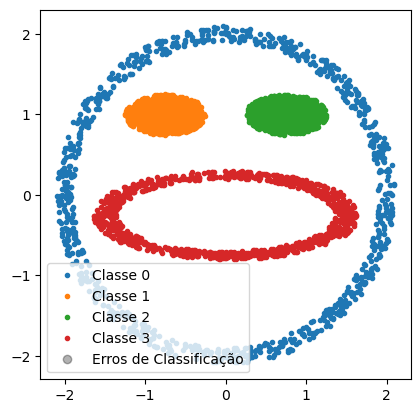

In [45]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

knn = KNeighborsClassifier(n_neighbors=k).fit(X_treino.T, y_treino)

y_teste_estimado = knn.predict(X_teste.T)

print("Número de Erros nos dados de teste: ", np.sum(y_teste != y_teste_estimado))
print("Matriz de Confusão: \n", confusion_matrix(y_teste, y_teste_estimado))

plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.')
plt.plot(X_teste[0, y_teste!=y_teste_estimado], X_teste[1, y_teste!=y_teste_estimado], 'ok', alpha=0.3)
plt.legend(["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Erros de Classificação"])
plt.axis('scaled')


Número de Erros nos dados de teste:  137
Matriz de Confusão: 
 [[769  15   5 111]
 [  0 900   0   0]
 [  0   0 900   0]
 [  0   0   6 894]]


(-2.3043880942158905,
 2.2988031021650333,
 -2.290827944229661,
 2.3026303529723813)

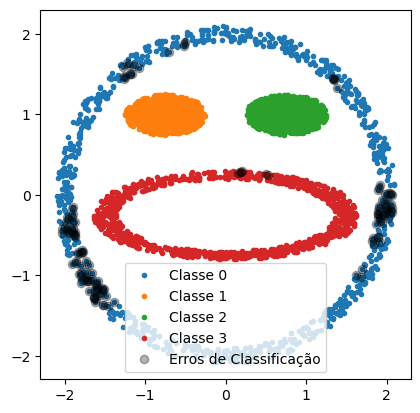

In [44]:
k = 15

knn = KNeighborsClassifier(n_neighbors=k).fit(X_treino.T, y_treino)

y_teste_estimado = knn.predict(X_teste.T)

print("Número de Erros nos dados de teste: ", np.sum(y_teste != y_teste_estimado))
print("Matriz de Confusão: \n", confusion_matrix(y_teste, y_teste_estimado))

plt.plot(X_teste[0, y_teste==0], X_teste[1, y_teste==0], '.')
plt.plot(X_teste[0, y_teste==1], X_teste[1, y_teste==1], '.')
plt.plot(X_teste[0, y_teste==2], X_teste[1, y_teste==2], '.')
plt.plot(X_teste[0, y_teste==3], X_teste[1, y_teste==3], '.')
plt.plot(X_teste[0, y_teste!=y_teste_estimado], X_teste[1, y_teste!=y_teste_estimado], 'ok', alpha=0.3)
plt.legend(["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Erros de Classificação"])
plt.axis('scaled')

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

Text(0.5, 1.0, 'Cosseno')

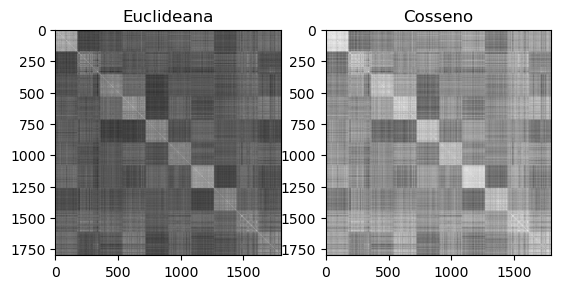

In [68]:
import sklearn.datasets as dt
import scipy.spatial.distance as spd

D=dt.load_digits()
X=D.data
y=D.target

index = np.argsort(y)

X = X[index, :]
y = y[index]

# plt.plot(y)

euc = spd.squareform(spd.pdist(X, 'euclidean'))
cos = spd.squareform(spd.pdist(X, 'cosine'))

plt.subplot(121)
plt.imshow(euc, cmap='binary')
plt.title('Euclideana')

plt.subplot(122)
plt.imshow(cos, cmap='binary')
plt.title('Cosseno')
